In [51]:
import numpy as np
import cv2 as cv
from skimage.feature import canny

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

import joblib

## **Ekstrasi Fitur**

In [52]:
def face_recognition(image_path):
    # Memuat Haar Cascade untuk deteksi wajah manusia atau kucing (Jika ada)
    # cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK_2024/Images/haarcascades/haarcascade_frontalface_default.xml')
    cascade_wajah = cv.CascadeClassifier('input_output/haarcascade_frontalface_default.xml')

    # Membaca Gambar
    image = cv.imread(image_path)

    # Mengubah gambar menjadi grayscale
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # scaleFactor: Faktor skala untuk memperkecil gambar setiap proses deteksi.
    # minNeighbors: Jumlah minimum tetangga yang diperlukan untuk validasi objek.
    # minSize: Ukuran minimum objek yang akan dideteksi.
    faces = cascade_wajah.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Wajah tidak terdeteksi
    if len(faces) == 0:
        print("Wajah tidak terdeteksi!")
        return None

    # Memproses setiap wajah yang terdeteksi
    for (x, y, w, h) in faces:
        # Memotong gambar sesuai area deteksi wajah
        face_crop = image[y:y+h, x:x+w]

    return face_crop

In [53]:
import random

def augment_image(image):
    augmented_image = image.copy()

    # Random horizontal flip
    if random.random() > 0.5:
        augmented_image = cv.flip(augmented_image, 1)

    # Random brightness/contrast adjustment
    if random.random() > 0.5:
        alpha = random.uniform(0.7, 1.3)  # Random contrast factor
        beta = random.randint(-50, 50)    # Random brightness factor
        augmented_image = cv.convertScaleAbs(augmented_image, alpha=alpha, beta=beta)

    # Random rotation (±15 degrees)
    if random.random() > 0.5:
        angle = random.randint(-15, 15)  # Random angle for rotation
        h, w = augmented_image.shape[:2]
        center = (w // 2, h // 2)
        rotation_matrix = cv.getRotationMatrix2D(center, angle, 1.0)
        augmented_image = cv.warpAffine(augmented_image, rotation_matrix, (w, h))

    # Random Gaussian blur
    if random.random() > 0.5:
        ksize = random.choice([3, 5, 7])  # Random kernel size
        augmented_image = cv.GaussianBlur(augmented_image, (ksize, ksize), 0)

    return augmented_image

In [54]:
def features_grid(img):
    features = np.array([], dtype='uint8')

    for y in range(0, img.shape[0], 10):
        for x in range(0, img.shape[1], 10):

            # Cropping the image into a section.
            section_img = img[y:y+10, x:x+10]

            # Claculating the mean and stdev of the sectioned image.
            section_mean = np.mean(section_img)
            section_std = np.std(section_img)

            # Appending the above calculated values into features array.
            features = np.append(features, [section_mean, section_std])

    # Returning the features array.
    return features

In [55]:
def extract_canny_edges(image_path, augment=False):
    img = face_recognition(image_path)
    if img is None:
        return None

    if augment:
        img = augment_image(img)

    # Mengonversi gambar ke grayscale
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Meresize gambar ke ukuran 200x200 piksel
    img = cv.resize(img, (200, 200))

    # Mengonversi gambar ke gambar dengan filter canny
    img = canny(img, sigma=0.9)

    # Ekstraksi fitur (mean dan stdev dari grid 10x10 piksel)
    img_features = features_grid(img)

    return img_features

In [56]:
def classify_image(image_path, model, augment=False):
    """
    Fungsi untuk mengklasifikasikan gambar menggunakan model yang telah dilatih.
    """
    features = extract_canny_edges(image_path, augment=augment)

    if features is None:
        return "Wajah tidak terdeteksi!"

    features = features.reshape(1, -1)
    label = model.predict(features)[0]
    return label

In [57]:
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan gambar dengan ukuran lebih kecil
def display_image(image, title="Image", figsize=(10, 10)):
    plt.figure(figsize=figsize)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

## **Klasifikasikan**

### SVM 0.556

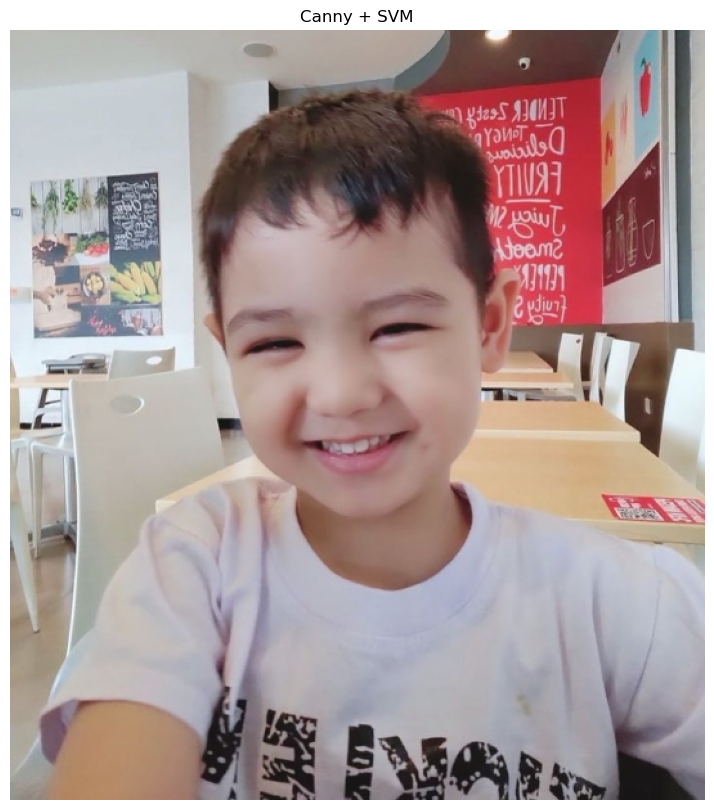

Prediksi Label (Augmented): 4
Prediksi Label (Original): 4


In [58]:
# Load model SVM
model_path = "input_output/svc_canny_model_acc_0.556.pkl"
svm_model = joblib.load(model_path)

# Memanggil gambar
image_path = 'assets/3.jpg'  # Update this path as needed
image = cv.imread(image_path)

# Tampilkan gambar dengan ukuran kecil
display_image(image, title="Canny + SVM", figsize=(10, 10))

# Prediksi dengan augmentasi
predicted_label_augmented = classify_image(image_path, svm_model, augment=True)
print(f"Prediksi Label (Augmented): {predicted_label_augmented}")

# Prediksi tanpa augmentasi
predicted_label_original = classify_image(image_path, svm_model, augment=False)
print(f"Prediksi Label (Original): {predicted_label_original}")


### SVM 0.463


c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.5.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator GridSearchCV from version 1.5.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


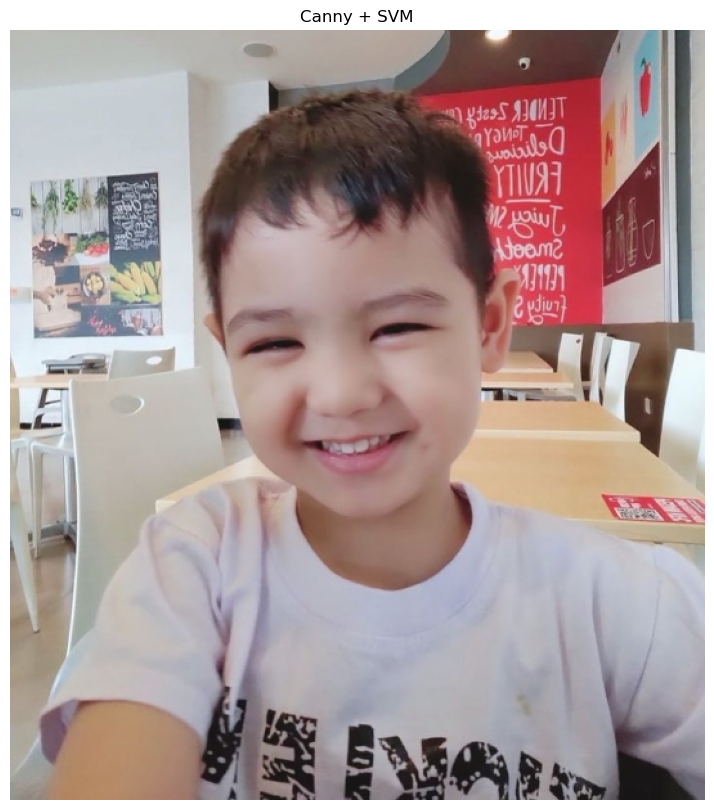

Prediksi Label (Augmented): 4
Prediksi Label (Original): 4


In [59]:
# Load model SVM
model_path = "input_output/svc_canny_model_acc_0.463.pkl"
svm_model = joblib.load(model_path)

# Memanggil gambar
image_path = 'assets/3.jpg'
image = cv.imread(image_path)

# Tampilkan gambar dengan ukuran kecil
display_image(image, title="Canny + SVM", figsize=(10, 10))

# Prediksi dengan augmentasi
predicted_label_augmented = classify_image(image_path, svm_model, augment=True)
print(f"Prediksi Label (Augmented): {predicted_label_augmented}")

# Prediksi tanpa augmentasi
predicted_label_original = classify_image(image_path, svm_model, augment=False)
print(f"Prediksi Label (Original): {predicted_label_original}")


### RF 0.493

c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.5.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


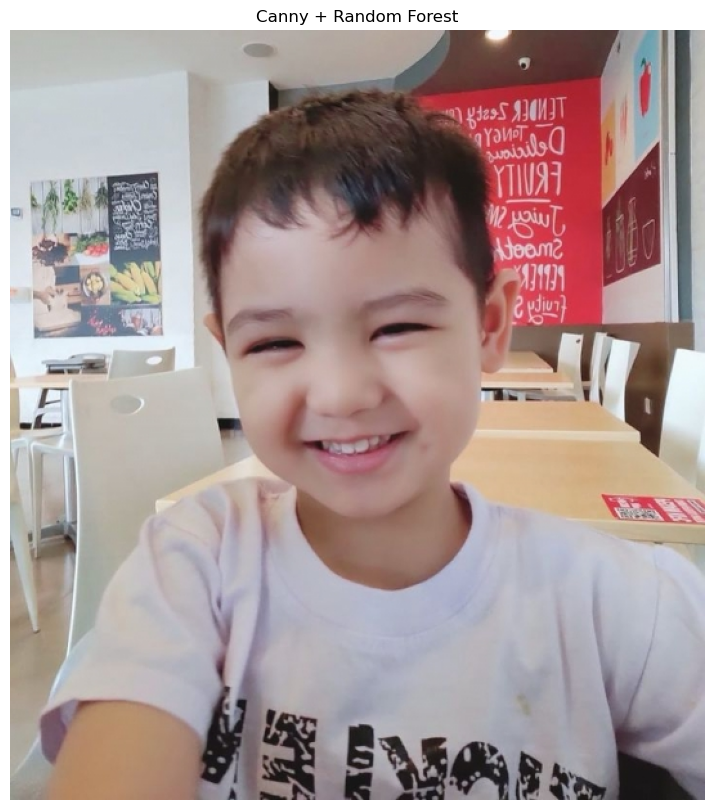

Prediksi Label (Augmented): 0


c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Prediksi Label (Original): 0


c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [60]:
# Load model
model_path = "input_output/rf_canny_model_acc_0.493.pkl"
rf_model = joblib.load(model_path)

# Memanggil gambar
image_path = 'assets/3.jpg'
image = cv.imread(image_path)

# Tampilkan gambar dengan ukuran kecil
display_image(image, title="Canny + Random Forest", figsize=(10, 10))

# Prediksi dengan augmentasi
predicted_label_augmented = classify_image(image_path, rf_model, augment=True)
print(f"Prediksi Label (Augmented): {predicted_label_augmented}")

# Prediksi tanpa augmentasi
predicted_label_original = classify_image(image_path, rf_model, augment=False)
print(f"Prediksi Label (Original): {predicted_label_original}")


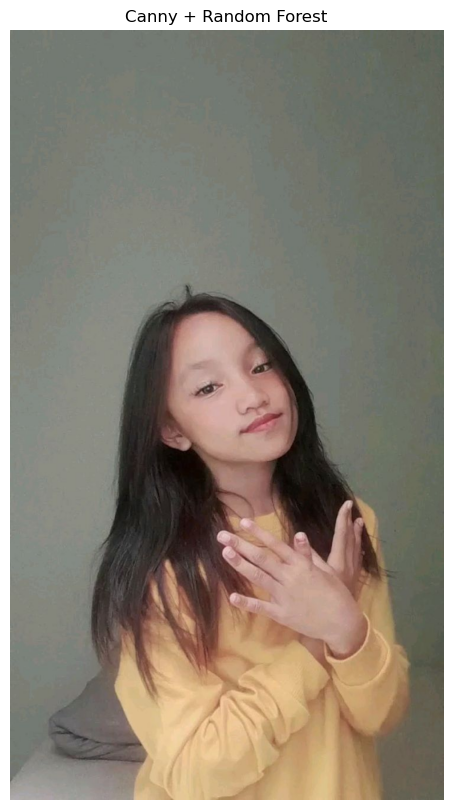

c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Prediksi Label (Augmented): 1
Prediksi Label (Original): 1


c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [61]:
# Memanggil gambar
image_path = 'assets/10.jpg'
image = cv.imread(image_path)

# Tampilkan gambar dengan ukuran kecil
display_image(image, title="Canny + Random Forest", figsize=(10, 10))

# Prediksi dengan augmentasi
predicted_label_augmented = classify_image(image_path, rf_model, augment=True)
print(f"Prediksi Label (Augmented): {predicted_label_augmented}")

# Prediksi tanpa augmentasi
predicted_label_original = classify_image(image_path, rf_model, augment=False)
print(f"Prediksi Label (Original): {predicted_label_original}")


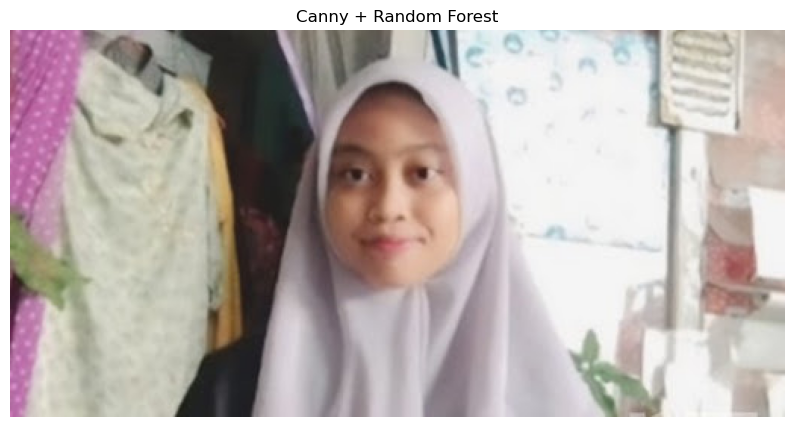

c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Prediksi Label (Augmented): 4
Prediksi Label (Original): 4


c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [62]:
# Memanggil Gambar
image_path = 'assets/15.jpg'
image = cv.imread(image_path)

# Tampilkan gambar dengan ukuran kecil
display_image(image, title="Canny + Random Forest", figsize=(10, 10))

# Prediksi dengan augmentasi
predicted_label_augmented = classify_image(image_path, rf_model, augment=True)
print(f"Prediksi Label (Augmented): {predicted_label_augmented}")

# Prediksi tanpa augmentasi
predicted_label_original = classify_image(image_path, rf_model, augment=False)
print(f"Prediksi Label (Original): {predicted_label_original}")


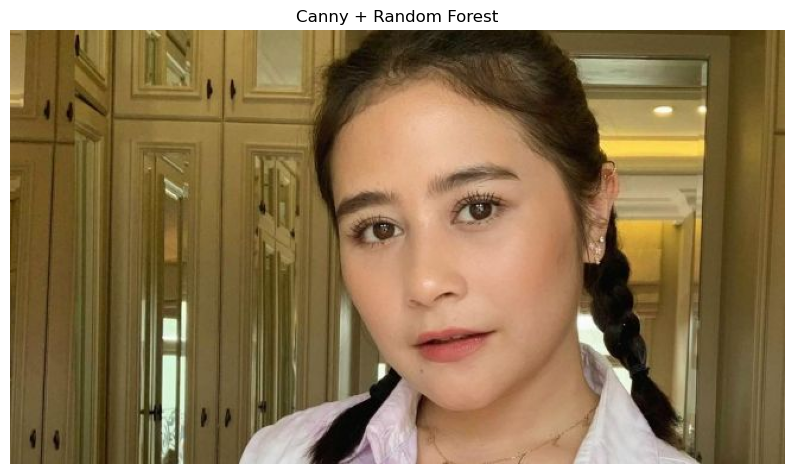

c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Prediksi Label (Augmented): 1
Prediksi Label (Original): 3


c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [63]:
# Memanggil gambar
image_path = 'assets/30.jpg'
image = cv.imread(image_path)

# Tampilkan gambar dengan ukuran kecil
display_image(image, title="Canny + Random Forest", figsize=(10, 10))

# Prediksi dengan augmentasi
predicted_label_augmented = classify_image(image_path, rf_model, augment=True)
print(f"Prediksi Label (Augmented): {predicted_label_augmented}")

# Prediksi tanpa augmentasi
predicted_label_original = classify_image(image_path, rf_model, augment=False)
print(f"Prediksi Label (Original): {predicted_label_original}")


### XGBoost 0.514

In [64]:
!pip install xgboost

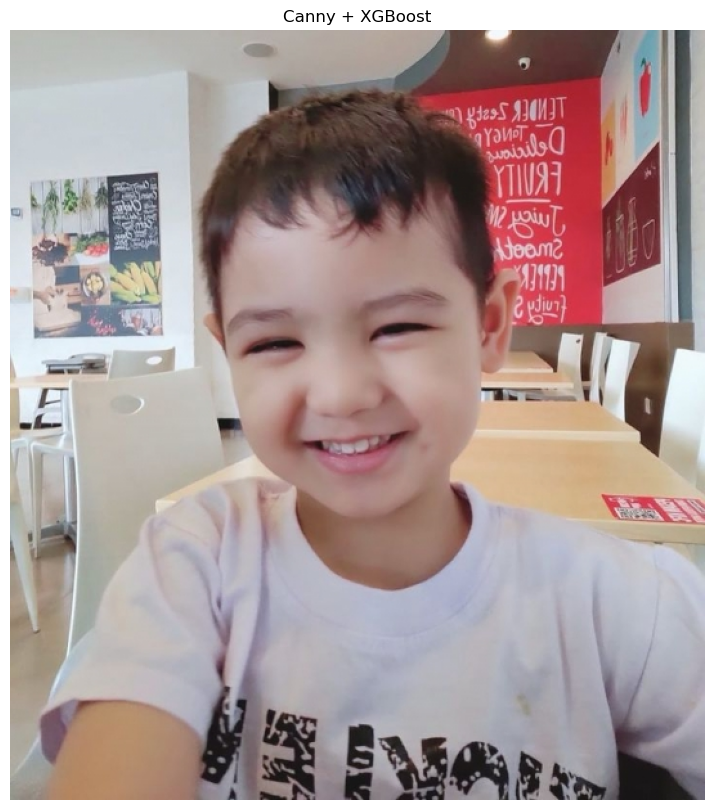

Prediksi Label (Augmented): 0
Prediksi Label (Original): 2


In [65]:
# Load model
model_path = "input_output/xgboost_canny_model_acc_0.514.pkl"
xgb_model = joblib.load(model_path)

# Memanggil Gambar
image_path = 'assets/3.jpg'
image = cv.imread(image_path)

# Tampilkan gambar dengan ukuran kecil
display_image(image, title="Canny + XGBoost", figsize=(10, 10))

# Prediksi dengan augmentasi
predicted_label_augmented = classify_image(image_path, xgb_model, augment=True)
print(f"Prediksi Label (Augmented): {predicted_label_augmented}")

# Prediksi tanpa augmentasi
predicted_label_original = classify_image(image_path, xgb_model, augment=False)
print(f"Prediksi Label (Original): {predicted_label_original}")


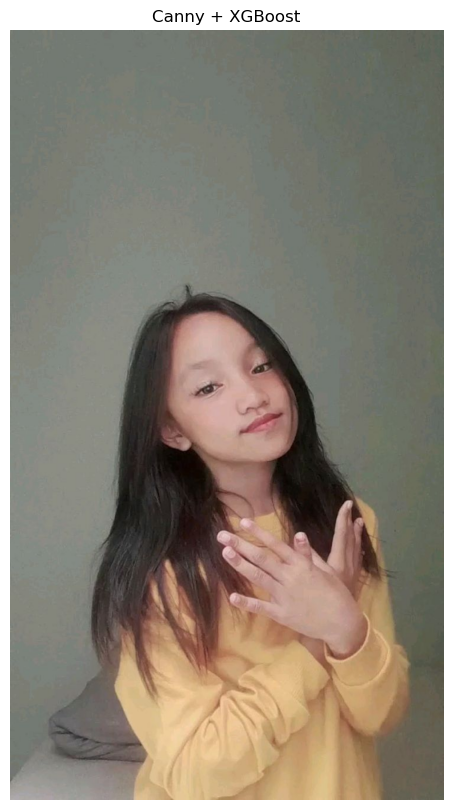

Prediksi Label (Augmented): 2
Prediksi Label (Original): 1


In [66]:
# Contoh Penggunaan
image_path = 'assets/10.jpg'
image = cv.imread(image_path)

# Tampilkan gambar dengan ukuran kecil
display_image(image, title="Canny + XGBoost", figsize=(10, 10))

# Prediksi dengan augmentasi
predicted_label_augmented = classify_image(image_path, xgb_model, augment=True)
print(f"Prediksi Label (Augmented): {predicted_label_augmented}")

# Prediksi tanpa augmentasi
predicted_label_original = classify_image(image_path, xgb_model, augment=False)
print(f"Prediksi Label (Original): {predicted_label_original}")


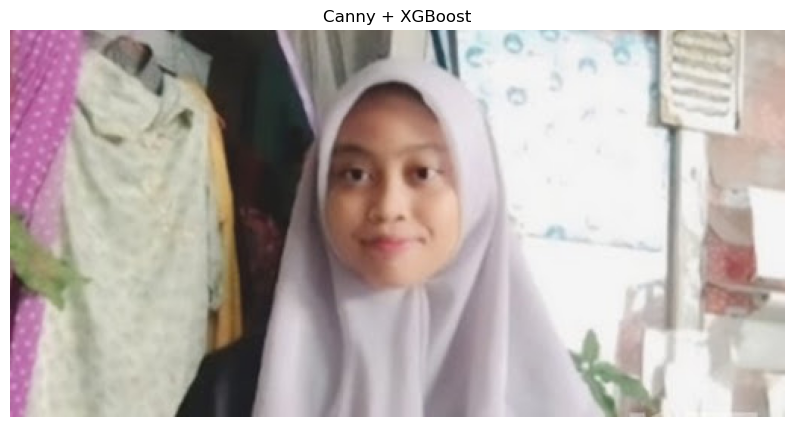

Prediksi Label (Augmented): 6
Prediksi Label (Original): 5


In [67]:
# Contoh Penggunaan
image_path = 'assets/15.jpg'
image = cv.imread(image_path)

# Tampilkan gambar dengan ukuran kecil
display_image(image, title="Canny + XGBoost", figsize=(10, 10))

# Prediksi dengan augmentasi
predicted_label_augmented = classify_image(image_path, xgb_model, augment=True)
print(f"Prediksi Label (Augmented): {predicted_label_augmented}")

# Prediksi tanpa augmentasi
predicted_label_original = classify_image(image_path, xgb_model, augment=False)
print(f"Prediksi Label (Original): {predicted_label_original}")


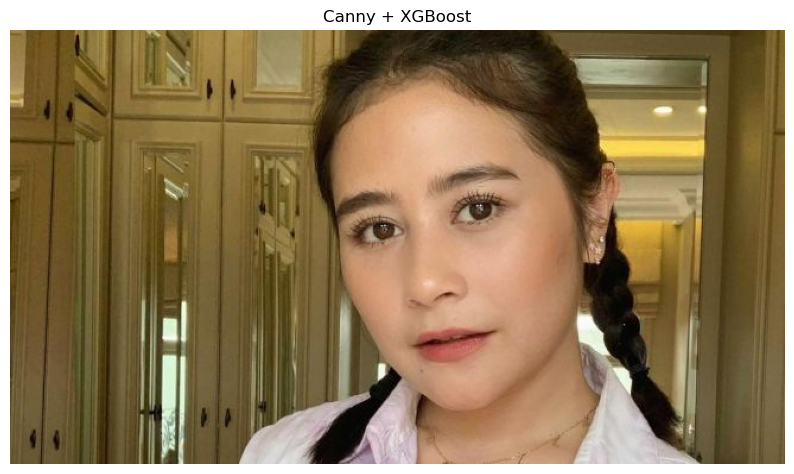

Prediksi Label (Augmented): 3
Prediksi Label (Original): 3


In [68]:
# Contoh Penggunaan
image_path = 'assets/30.jpg'
image = cv.imread(image_path)

# Tampilkan gambar dengan ukuran kecil
display_image(image, title="Canny + XGBoost", figsize=(10, 10))

# Prediksi dengan augmentasi
predicted_label_augmented = classify_image(image_path, xgb_model, augment=True)
print(f"Prediksi Label (Augmented): {predicted_label_augmented}")

# Prediksi tanpa augmentasi
predicted_label_original = classify_image(image_path, xgb_model, augment=False)
print(f"Prediksi Label (Original): {predicted_label_original}")


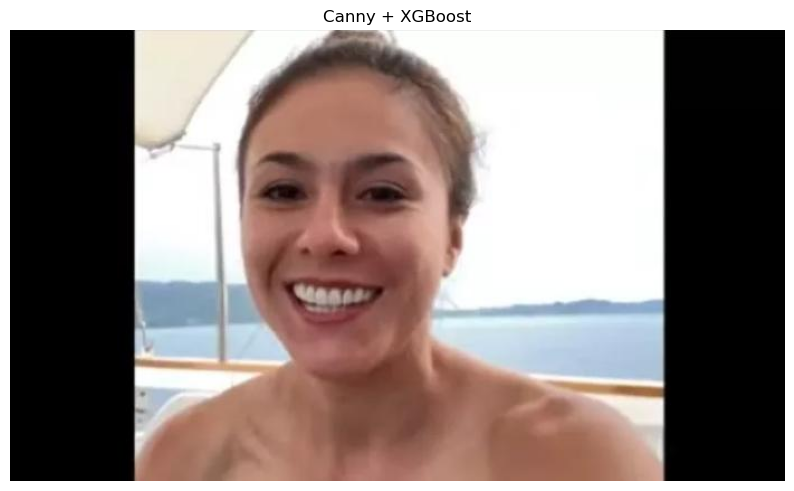

Prediksi Label (Augmented): 6
Prediksi Label (Original): 6


In [69]:
# Contoh Penggunaan
image_path = 'assets/40.jpg'
image = cv.imread(image_path)

# Tampilkan gambar dengan ukuran kecil
display_image(image, title="Canny + XGBoost", figsize=(10, 10))

# Prediksi dengan augmentasi
predicted_label_augmented = classify_image(image_path, xgb_model, augment=True)
print(f"Prediksi Label (Augmented): {predicted_label_augmented}")

# Prediksi tanpa augmentasi
predicted_label_original = classify_image(image_path, xgb_model, augment=False)
print(f"Prediksi Label (Original): {predicted_label_original}")


### Akurasi

In [72]:
import pandas as pd

# Membaca file CSV yang berisi data gambar dan label
test_data_path = "input_output/images_filenames_labels_test.csv"
test_data = pd.read_csv(test_data_path)

# Menampilkan beberapa baris pertama dari data
print(test_data.head())

                  filename  age
0  062_1684_aug_3072_1.png   62
1    065_1292_original.png   65
2    038_221_aug_508_2.png   38
3  001_1102_aug_1012_2.png    1
4  012_1388_aug_1769_0.png   12


In [73]:
from sklearn.metrics import accuracy_score

def evaluate_model(test_data, model, augment=False):
    """
    Menghitung akurasi model berdasarkan data uji.
    
    Parameters:
    - test_data: DataFrame berisi kolom `filename` dan `label`.
    - model: Model yang telah dilatih.
    - augment: Jika True, menggunakan augmentasi gambar.

    Returns:
    - akurasi: Akurasi model pada dataset uji.
    """
    true_labels = []
    predicted_labels = []

    for _, row in test_data.iterrows():
        # Mendapatkan path gambar
        image_path = f"dataset/augmented_dataset/{row['filename']}"

        # Melakukan prediksi
        predicted_label = classify_image(image_path, model, augment=augment)

        # Menyimpan hasil prediksi dan label sebenarnya
        true_labels.append(row['label'])
        predicted_labels.append(predicted_label)

    # Menghitung akurasi
    accuracy = accuracy_score(true_labels, predicted_labels)
    return accuracy

In [74]:
# Menghitung akurasi untuk model SVM dengan akurasi 0.556
model_path = "input_output/svc_canny_model_acc_0.556.pkl"
svm_model_556 = joblib.load(model_path)
accuracy_svm_556 = evaluate_model(test_data, svm_model_556, augment=False)
print(f"Akurasi SVM (0.556): {accuracy_svm_556}")

# Menghitung akurasi untuk model SVM dengan akurasi 0.463
model_path = "input_output/svc_canny_model_acc_0.463.pkl"
svm_model_463 = joblib.load(model_path)
accuracy_svm_463 = evaluate_model(test_data, svm_model_463, augment=False)
print(f"Akurasi SVM (0.463): {accuracy_svm_463}")

# Menghitung akurasi untuk model Random Forest
model_path = "input_output/rf_canny_model_acc_0.493.pkl"
rf_model = joblib.load(model_path)
accuracy_rf = evaluate_model(test_data, rf_model, augment=False)
print(f"Akurasi Random Forest: {accuracy_rf}")

# Menghitung akurasi untuk model XGBoost
model_path = "input_output/xgboost_canny_model_acc_0.514.pkl"
xgb_model = joblib.load(model_path)
accuracy_xgb = evaluate_model(test_data, xgb_model, augment=False)
print(f"Akurasi XGBoost: {accuracy_xgb}")


c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.5.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator GridSearchCV from version 1.5.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Wajah tidak terdeteksi!


KeyError: 'label'